# __<center>CAPSTONE PROJECT MODULE 3</center>__

# <center>Regression: Customer Lifetime Value Prediction</center>

### **Sumber Data**
- [Klik disini (G-Drive)](https://drive.google.com/drive/folders/1RJ5g9FNQ3JNEE4Tyl5KgxJodGniYw8S9) 
- [Atau klik disini (Kaggle)](https://www.kaggle.com/datasets/pankajjsh06/ibm-watson-marketing-customer-value-data)
### **Daftar Isi**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Cross Validation
5. Hyperparameter Tuning
6. Modeling
7. Conclusion
8. Recommendation

### **1. Business Problem Understanding**

**Context**

Perusahaan A adalah sebuah perusahaan asal Amerika Serikat yang bergerak di bidang asuransi. Dalam dunia bisnis, kemampuan sebuah perusahaan untuk membuat kliennya "betah" dan loyal terhadap perusahaan itu sangatlah krusial. Klien yang loyal adalah salah satu sumber *profit* yang stabil bagi perusahaan A. Maka dari itu, perusahaan A perlu mengetahui seberapa "berharga" seorang klien dari perusahaan A. Untuk mengukur tingkat "harga" klien, ada sebuah metrik pengukuran yang dinamakan sebagai *__customer lifetime value (CLV)__*. 

*__Customer lifetime value (CLV)__* adalah ukuran seberapa "berharga"nya seorang klien terhadap suatu perusahaan. Ada juga yang berpendapat bahwa *CLV* adalah nilai masa kini dari arus uang (*cash flow*) di masa depan yang dimiliki oleh seorang pelanggan selama hubungannya dengan perusahaan. Secara umum, *customer lifetime value* dapat memberi informasi kepada perusahaan jumlah *revenue* dan *profit* yang dihasilkan dan dapat dihasilkan oleh seorang klien, baik di masa sekarang, maupun masa depan. *Customer lifetime *value* sangatlah penting bagi perusahaan Apabila mereka ingin menargetkan pemasaran yang lebih efektif terhadap klien dengan *value* yang berbeda-beda.

**Problem Statement**

Salah satu tantangan terbesar bagi perusahaan A adalah menentukan nilai atau *value* seorang calon klien agar perusahaan A dapat menentukan pendekatan atau teknik pemasaran yang cocok digunakan untuk klien tersebut.

Dengan variasi aset dan status sosial klien yang beragam, menentukan *CLV* pelanggan dengan tepat untuk dapat tetap kompetitif dan memastikan bahwa mereka mendapat layanan yang memuaskan sangatlah penting.

**Goals**

Berdasarkan permasalahan tersebut, perusahaan A tentu perlu memiliki 'tool' yang dapat memprediksi serta membantu klien mereka (dalam hal ini klien mereka) untuk dapat **menentukan *customer lifetime value* pelanggan berdasarkan fitur-fitur tertentu dengan akurat**. Adanya perbedaan pada berbagai fitur yang dimiliki klien, seperti jenis kendaraan, jumlah pendapatan, dan tingkat edukasi dapat menambah keakuratan prediksi nilai klien tersebut.

Bagi perusahaan A, *prediction tool* yang dapat memberikan prediksi *CLV* secara akurat tentu dapat meningkatkan jumlah klien. Dengan kata lain, semakin banyak klien berarti dapat meningkatkan *revenue* perusahaan, dalam konteks ini didapat dari premi asuransi klien.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu klien dengan yang lainnya. 

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan algoritma prediksi *CLV* yang baru masuk dalam daftar calon klien perusahaan A, yang mana akan berguna untuk perusahaan dalam menentukan segmentasi pelanggan.

**Evaluation Metrics**

Metrik evaluasi yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rata-rata akar kuadrat dari *error*, MAE adalah rata-rata nilai absolut dari *error*, dan MAPE adalah rata-rata persentase *error* yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi *CLV* sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai *R-squared* atau *adj. R-squared* jika model yang nanti terpilih sebagai final model adalah model linear. Nilai *R-squared* digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin *fit* atau cocok pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

### **2. Data Understanding**

- Dataset merupakan data perusahaan asuransi mobil di Amerika pada tahun 2019.
- Setiap baris data merepresentasikan informasi terkait aset, status sosial, dan informasi lain dari seorang klien.

**Features Information**

| **Feature** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class | Object | Class of Customer Vehicle |
| Coverage | Object | Type of Insurance Policies |
| Renew Offer Type | Object | Type of Renewal Offers |
| Employment Status | Object | Customer Employment Status |
| Marital Status | Object | Customer Marital Status |
| Education | Object | Customer Education Level |
| Number of Policies | Float | Number of Policies Customer Currently Owns |
| Monthly Premium Auto | Float | Amount of customers' monthly insurance payments (in US$)|
| Total Claim Amount | Float | Cumulative Amount of Claims Since Policy Inception|
| Income | Float | Customer Income (in US$)|
| Customer Lifetime Value | Float | Customer Lifetime Value |

[Feature Information Source](https://www.kaggle.com/code/juancarlosventosa/models-to-improve-customer-retention/notebook) 
<br>

**Import Libraries**

In [58]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PolynomialFeatures

# Machine Learning Algorithm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

# Evaluation Metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

catatan: kita tidak menggunakan fungsi *cross_val_score* karena ingin mencoba lebih dari 1 *evaluation metric* sekaligus, dan VSCode menyarankan untuk menggunakan fungsi *cross_validate*.

**Load Dataset**

Mari kita load dataset terlebih dahulu

In [2]:
df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


Ternyata, setiap baris pada dataset ini merupakan informasi dari seorang klien dari perusahaan A. Mari kita hitung jumlah klien (jumlah baris) pada dataset ini menggunakan fungsi .shape

In [3]:
df.shape

(5669, 11)

Terdapat 5669 klien pada dataset ini.

Mari tampilkan berbagai macam informasi mengenai dataset ini

In [4]:
display(df.describe(), df.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [6]:
df.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

Dapat dilihat bahwa tidak ada data yang bernilai 'NaN' pada dataset ini. Tapi, bukan berarti tidak ada *missing values* sama sekali. Terkadang seorang *data engineer* menggunakan kode spesifik untuk menandai *missing values*. Mari kita cek menggunakan kode *loop* dibawah untuk melihat setiap data unik dari tiap kolom

In [7]:
for i in df.columns:
   print(df[i].value_counts())
   print()

Four-Door Car    2858
Two-Door Car     1186
SUV              1096
Sports Car        307
Luxury SUV        115
Luxury Car        107
Name: Vehicle Class, dtype: int64

Basic       3477
Extended    1704
Premium      488
Name: Coverage, dtype: int64

Offer1    2292
Offer2    1835
Offer3     900
Offer4     642
Name: Renew Offer Type, dtype: int64

Employed         3541
Unemployed       1429
Medical Leave     267
Disabled          252
Retired           180
Name: EmploymentStatus, dtype: int64

Married     3305
Single      1514
Divorced     850
Name: Marital Status, dtype: int64

Bachelor                1703
College                 1660
High School or Below    1620
Master                   460
Doctor                   226
Name: Education, dtype: int64

1.0    2008
2.0    1413
3.0     727
7.0     271
5.0     270
9.0     264
4.0     251
6.0     236
8.0     229
Name: Number of Policies, dtype: int64

65.0     217
71.0     203
66.0     186
69.0     185
63.0     185
        ... 
287.0      1
162.

Seperti yang kita telah duga, ternyata pada kolom 'Income' terdapat 1429 data yang bernilai '0'. Karena jumlahnya sangat banyak, dapat kita simpulkan bahwa seluruh data pada kolom 'Income' yang bernilai '0' adalah *missing values*. Kita akan isi *missing values* ini menggunakan *iterative imputer* yang akan kita lakukan nanti

Sekarang, mari kita cek data yang duplikat menggunakan dataframe agar rapi

In [8]:
df_duplicate = pd.DataFrame({
    'No.':[1],
    'Jumlah Data Duplikat':df.duplicated().sum(),
    'Persentase Data Duplikat':df.duplicated().sum() / len(df) * 100,
})

df_duplicate.drop(columns='No.', inplace=True) 
#kenapa diatas sudah buat kolom No. tapi didrop? Karena kalau tidak diberikan index, maka akan error dataframenya. Untuk mengakali, dibikin dulu index, lalu didrop

df_duplicate

,Jumlah Data Duplikat,Persentase Data Duplikat
0,618,10.901394


In [9]:
df.shape[0]

5669

Ternyata, ada 618 data yang duplikat (sekitar 10.9% dari seluruh data). Karena banyak fitur kita yang berupa *numerical continuous*, maka kemungkinan bahwa data duplikat karena salah *input* sangat tinggi. Maka dari itu, untuk menghindari *overfitting model*, kita drop saja seluruh data duplikatnya.

In [10]:
df = df.drop_duplicates()
df.shape

(5051, 11)

Setelah menghapus data yang duplikat, mari kita perbaiki nama kolom 'EmploymentStatus' menjadi 'Employment Status' agar format penulisan menjadi konsisten

In [11]:
df = df.rename(columns={'EmploymentStatus':'Employment Status'})
df.head()

,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


Mari kita cek apakah ada outliers pada dataset ini

In [12]:
# Menentukan kolom numerikal
num_features = list(df.describe().columns)
num_features

['Number of Policies',
 'Monthly Premium Auto',
 'Total Claim Amount',
 'Income',
 'Customer Lifetime Value']

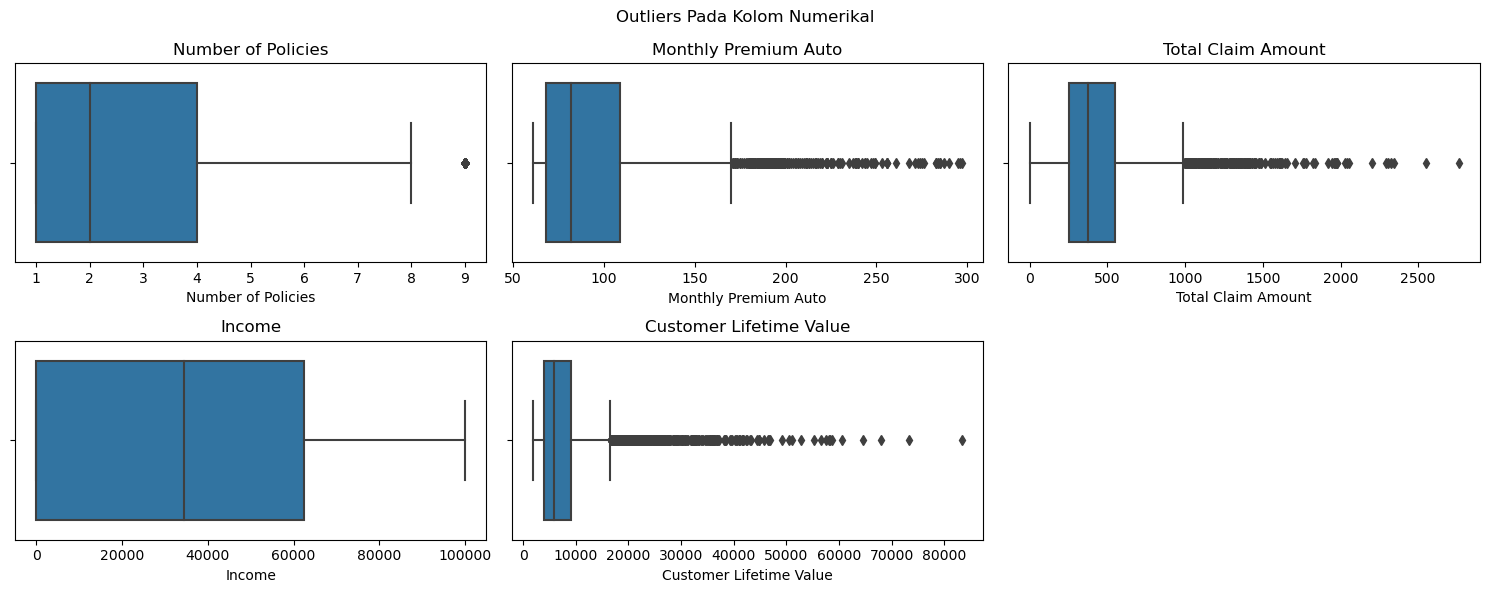

In [13]:
plotnumber = 1

plt.figure(figsize=(15,6))
plt.suptitle('Outliers Pada Kolom Numerikal')
for kolom in num_features:

    plt.subplot(2,3, plotnumber)
    sns.boxplot(data=df, x=kolom)
    plt.title(kolom)
    plt.tight_layout()

    plotnumber = plotnumber + 1

Mari kita buang data dengan *Monthly Premium Auto* diatas 250

In [14]:
# Jumlah data awal
df.shape[0]

5051

In [15]:
# drop outliers Monthly Premium Auto
df = df[~(df['Monthly Premium Auto'] > 250)]
df.shape[0]

5030

Ternyata ada 29 data outliers pada kolom 'Monthly Premium Auto' yang terbuang. Sekarang mari kita buang data dengan Total Claim Amount diatas 2000

In [16]:
# drop outliers Total Claim Amount
df = df[~(df['Total Claim Amount'] > 2000)]
df.shape[0]

5022

Ternyata ada 8 data outliers pada kolom 'Total Claim Amount' yang terbuang. Sekarang mari kita buang data dengan Customer Lifetime Value diatas 60000

In [17]:
# drop outliers Customer Lifetime Value
df = df[~(df['Customer Lifetime Value'] > 60000)]
df.shape[0]

5017

Ternyata ada 5 data outliers pada kolom 'Customer Lifetime Value' yang terbuang

Jadi total data outliers yang kita buang ada 42 data

Kenapa kita  tidak membuang seluruh outliers? Karena jumlah data kita sangat sedikit (hanya 5669 data diawal). Apabila kita membuang semua outliers, maka limitasi data kita akan menjadi besar (model hanya belajar dari rentang data yang kecil)

### **3. Data Preprocessing**

Sebelum kita mulai *data preprocessing*, mari kita tentukan X (features) dan y (target) dari dataset ini. Target dari proyek ini adalah untuk memprediksi berapa jumlah *Customer Lifetime Value* berdasarkan fitur-fitur yang tersedia (fitur = semua kolom selain kolom 'Customer Lifetime Value', target = kolom 'Customer Lifetime Value')

In [18]:
X = df.drop(columns='Customer Lifetime Value')
y = df['Customer Lifetime Value']

Selanjutnya, mari kita *split* data kita menjadi set latihan dan set ujian. Disini saya menggunakan ratio train set dengan test set sebesar 80:20 dengan random_state = 0.

Disini saya tidak menggunakan parameter 'stratify' pada data splitting karena target kita (kolom 'Customer Lifetime Value') berupa numerical continuous variable.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
display(X_train, X_test, y_train, y_test)

,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income
5524,Four-Door Car,Basic,Offer3,Employed,Married,College,5.0,74.0,250.454012,32848.0
4681,Luxury Car,Extended,Offer3,Employed,Married,Bachelor,4.0,217.0,1122.658899,39411.0
1722,Four-Door Car,Extended,Offer2,Employed,Single,Doctor,1.0,90.0,634.385937,28248.0
1469,Two-Door Car,Extended,Offer3,Unemployed,Single,High School or Below,6.0,94.0,676.800000,0.0
4205,SUV,Basic,Offer3,Employed,Divorced,Doctor,9.0,119.0,423.785148,90334.0
...,...,...,...,...,...,...,...,...,...,...
5566,Two-Door Car,Extended,Offer1,Unemployed,Single,High School or Below,2.0,89.0,538.689882,0.0
3603,Four-Door Car,Extended,Offer2,Unemployed,Married,College,8.0,80.0,488.910614,0.0
1756,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor,2.0,74.0,225.518065,35300.0
2837,Four-Door Car,Basic,Offer2,Employed,Married,High School or Below,2.0,72.0,202.813730,76214.0


,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income
453,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,8.0,65.0,463.382118,0.0
337,Two-Door Car,Basic,Offer4,Unemployed,Married,Master,1.0,72.0,345.600000,0.0
2212,Four-Door Car,Extended,Offer1,Employed,Married,Bachelor,2.0,89.0,527.139074,75313.0
3093,Four-Door Car,Extended,Offer2,Unemployed,Divorced,High School or Below,3.0,89.0,640.800000,0.0
4020,Four-Door Car,Basic,Offer1,Unemployed,Single,College,2.0,69.0,340.780156,0.0
...,...,...,...,...,...,...,...,...,...,...
903,SUV,Extended,Offer3,Employed,Married,Master,3.0,121.0,272.788141,99654.0
3167,Four-Door Car,Basic,Offer1,Unemployed,Married,Master,2.0,67.0,321.600000,0.0
3287,Four-Door Car,Basic,Offer1,Employed,Single,Master,3.0,69.0,107.985836,74960.0
916,Four-Door Car,Extended,Offer4,Employed,Married,College,1.0,80.0,529.490007,43499.0


5524     5876.054314
4681    16936.271470
1722     3536.431774
1469     6291.589959
4205     9635.583730
            ...     
5566    24258.713830
3603     6006.963446
1756    26305.415410
2837     8676.698631
2980     3106.482540
Name: Customer Lifetime Value, Length: 4013, dtype: float64

453      4484.254754
337      2570.761765
2212    10700.495200
3093     6039.020697
4020    16938.298580
            ...     
903      9863.502214
3167    19837.305480
3287     5507.155471
916      3141.252909
875      9337.895228
Name: Customer Lifetime Value, Length: 1004, dtype: float64

Mari kita catat kolom apa saja yang perlu di proses:
- Kolom numerikal:
    - Scaling
        - Number of Policies
        - Monthly Premium Auto
        - Total Claim Amount
        - Income
        <br><br>
- Kolom kategorikal:
    - Onehot Encoder
        - Vehicle Class
        - Renew Offer Type
        - Employment Status
        - Marital Status
        <br><br>
    - Ordinal Encoder
        - Coverage
        - Education

Kolom 'Coverage' dan 'Education' di-*encode* dengan metode ordinal karena kedua kolom itu memiliki 'urutan' atau 'ranking'.

Masih ingat *missing values* pada kolom 'Income'? Disini kita akan ganti *missing values* tersebut menjadi NaN, lalu diisi dengan *Iterative Imputer*.

In [21]:
# Mengubah nilai '0' pada kolon 'Income' menjadi NaN
df['Income'] = df['Income'].replace([0], np.nan)

In [22]:
df['Income'].isna().sum()

1320

Kita telah berhasil mengganti seluruh *missing values* pada kolom 'Income' menjadi NaN. Hal ini akan mempermudah kita saat menggunakan *iterative imputer* nanti.

Mari kita bikin *pipeline* dan *transformer* untuk *preprocess* data ini.

In [23]:
df.head(3)

,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810


In [53]:
# Membuat ordinal mapping untuk kolom 'Coverage' dan 'Education
ordinal_mapping = [
    {'col':'Coverage', 'mapping':{'Basic':1, 'Extended':2, 'Premium':3, None:0}},
    {'col':'Education', 'mapping':{'High School or Below':1, 'College':2, 'Bachelor':3, 'Master':4, 'Doctor':5, None:0}}
]

In [61]:
# transformer 

pipe_iterative_robust = Pipeline([
    ('iterative_imputer', IterativeImputer(random_state=0)),
    ('polynomial', PolynomialFeatures(degree=1)),
    ('scaler', RobustScaler())
])

pipe_ordinal_robust = Pipeline([
    ('ordinal_encoder', OrdinalEncoder(cols=['Coverage', 'Education'], mapping=ordinal_mapping)),
    ('scaler', RobustScaler())
])

transformer = ColumnTransformer([
    ('pipe_iterative_robust', pipe_iterative_robust, ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']),
    ('onehot_encoder', OneHotEncoder(drop='first'), ['Vehicle Class', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('ordinal_encoder', pipe_ordinal_robust, ['Coverage', 'Education']),
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_iterative_robust',
                                 Pipeline(steps=[('iterative_imputer',
                                                  IterativeImputer(random_state=0)),
                                                 ('polynomial',
                                                  PolynomialFeatures(degree=1)),
                                                 ('scaler', RobustScaler())]),
                                 ['Number of Policies', 'Monthly Premium Auto',
                                  'Total Claim Amount', 'Income']),
                                ('onehot_encoder', OneHotEncoder(drop='first'),
                                 ['Vehicle...
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder(cols=['Coverage',
                                                                       'Education'],
        

Seluruh fitur numerikal akan melalui proses *iterative imputer*, *polynomial feature*, dan *robust scaling*.

Fitur 'Coverage' dan 'Education' memiliki tingkatan/*ranking* (kategorikal ordinal), maka kedua fitur ini akan melalui proses *ordinal encoder* dan *robust scaling*. 

Fitur 'Vehicle Class', 'Renew Offer Type', 'Employment Status', dan 'Marital Status' akan melalui proses *onehot encoder* karena tidak memiliki tingkatan (kategorikal nominal).

Sisanya akan dilewati.

Mengapa saya menggunakan *polynomial feature*? Karena jumlah kolom yang kita punya sangat sedikit (kemungkinan model untuk *underfitting* akan besar), maka saya pakai *polynomial feature* untuk mengatasi masalah itu. Namun, cara ini belum tentu dapat meningkatkan performa model. Kita akan lihat nanti dibawah.

### **4. Cross Validation**

Pada tahap ini, kita dapat menentukan model atau algoritma *machine learning* yang paling cocok untuk memprediksi *CLV* berdasarkan *dataset* yang kita punya. Berikut adalah daftar model atau algoritma yang akan kita masukkan kedalam *cross validation*:
- Linear Regression
- Lasso
- Ridge
- KNN
- Decision Tree
- Random Forest
- Ada Boost
- Gradient Boost
- XGBoost

Mari kita buat benchmark model untuk di *cross validate*

In [62]:
linear_regression = LinearRegression()
lasso = Lasso(alpha = 1, random_state=0)
ridge = Ridge(random_state=0)
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
adaboost = AdaBoostRegressor(random_state=0)
gboost = GradientBoostingRegressor(random_state=0)
xgboost = XGBRegressor()

list_algo = [linear_regression, lasso, ridge, knn, tree, rf, adaboost, gboost, xgboost]

Mari kita buat daftar *evaluation metrics* yang akan digunakan untuk proses *cross validation* pada parameter *scoring*:
- MSE
- RMSE
- MAE
- MAPE

Gunakan function dibawah untuk melihat daftar *evaluation metric* yang dapat digunakan didalam *cross validation*.

In [63]:
# library dan function ini saya dapat dari error message vscode kak hehe
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [64]:
eval_metric = {
    'mse': 'neg_mean_squared_error',
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'mape': 'neg_mean_absolute_percentage_error'}

In [65]:
list_MSE = []
list_mean_MSE = []
list_std_MSE = []

list_RMSE = []
list_mean_RMSE = []
list_std_RMSE = []

list_MAE = []
list_mean_MAE = []
list_std_MAE = []

list_MAPE = []
list_mean_MAPE = []
list_std_MAPE = []

for algo in list_algo:
    pipe_model = Pipeline([
        ('transformer', transformer),
        ('algo', algo)
    ])

    # Cross validation untuk mencari model terbaik
    cv_score = cross_validate(
        estimator= pipe_model,
        X= X_train, 
        y= y_train,
        scoring= eval_metric,
        cv = 5
    )
    # MSE Score
    list_MSE.append(cv_score['test_mse'])
    list_mean_MSE.append(cv_score['test_mse'].mean())
    list_std_MSE.append(cv_score['test_mse'].std())

    # RMSE Score
    list_RMSE.append(cv_score['test_rmse'])
    list_mean_RMSE.append(cv_score['test_rmse'].mean())
    list_std_RMSE.append(cv_score['test_rmse'].std())

    # MAE Score
    list_MAE.append(cv_score['test_mae'])
    list_mean_MAE.append(cv_score['test_mae'].mean())
    list_std_MAE.append(cv_score['test_mae'].std())

    # MAPE Score
    list_MAPE.append(cv_score['test_mape'])
    list_mean_MAPE.append(cv_score['test_mape'].mean())
    list_std_MAPE.append(cv_score['test_mape'].std())

In [66]:
df_cross_val = pd.DataFrame({
    'algo':list_algo,

    'mse_mean':list_mean_MSE,
    'mse_std':list_std_MSE,
    'mse_all':list_MSE,

    'rmse_mean':list_mean_RMSE,
    'rmse_std':list_std_RMSE,
    'rmse_all':list_RMSE,

    'mae_mean':list_mean_MAE,
    'mae_std':list_std_MAE,
    'mae_all':list_MAE,

    'mape_mean':list_mean_MAPE,
    'mape_std':list_std_MAPE,
    'mape_all':list_MAPE

}).sort_values('mape_mean', ascending=False)

df_cross_val.head(5)

,algo,mse_mean,mse_std,mse_all,rmse_mean,rmse_std,rmse_all,mae_mean,mae_std,mae_all,mape_mean,mape_std,mape_all
5,RandomForestRegressor(random_state=0),-1.580048e+07,2.303758e+06,"[-19490165.897119045, -15573997.759266403, -16...",-3964.405940,289.766757,"[-4414.766799856935, -3946.390472224765, -4075...",-1636.456060,139.348753,"[-1852.3831961662402, -1634.0446803596212, -16...",-0.121835,0.008417,"[-0.13688051414356606, -0.12280114563185779, -..."
4,DecisionTreeRegressor(random_state=0),-2.866165e+07,4.416965e+06,"[-36824899.812024824, -24702079.06332611, -286...",-5338.704089,399.862708,"[-6068.352314428095, -4970.118616625373, -5349...",-1948.701809,214.360221,"[-2341.4360545660024, -1785.4502910890412, -19...",-0.142181,0.014392,"[-0.17020980955628479, -0.1292327499225977, -0..."
7,GradientBoostingRegressor(random_state=0),-1.431216e+07,1.682428e+06,"[-17277344.61971827, -13657369.449224038, -145...",-3776.790622,219.115455,"[-4156.602533285841, -3695.5878354091433, -381...",-1724.231850,95.095738,"[-1856.4868537627249, -1716.3685893927413, -17...",-0.146471,0.003056,"[-0.14945300803023656, -0.14786000264097585, -..."
8,"XGBRegressor(base_score=None, booster=None, ca...",-1.758260e+07,2.954995e+06,"[-22658931.45021376, -15721064.729551032, -189...",-4178.987745,344.476125,"[-4760.139856161136, -3964.979789299188, -4358...",-2072.465666,143.180137,"[-2322.5164793897784, -2040.7931359005916, -20...",-0.214080,0.008408,"[-0.22716686947660772, -0.21358501269199184, -..."
6,AdaBoostRegressor(random_state=0),-2.313341e+07,3.719847e+06,"[-21732241.25318272, -17898509.167875975, -226...",-4794.359306,384.089494,"[-4661.785200240646, -4230.662970253714, -4762...",-3321.146377,589.899468,"[-2841.9863647447314, -2551.990450520236, -341...",-0.421925,0.110258,"[-0.3160946135648992, -0.2803268300558657, -0...."


Dari hasil *cross validation* diatas, ternyata model atau algoritma ML terbaik untuk data kita adalah random forest (untuk menentukan model terbaik, saya melihat rata-rata MAPE terkecil dengan standar deviasi yang tidak besar/model stabil).

Namun, agar lebih pasti, saya akan mengambil 3 model terbaik (random forest, gradient boosting, dan decision tree) dan akan dilakukan proses *grid search* lalu membandingkan performa model diakhir.

### **5. Hyperparameter Tuning**

#### Hyperparameter tuning untuk random forest

Melakukan *randomized search* agar proses *running* lebih cepat

In [67]:
hyperparam_space = {
    'modeling__n_estimators': range(10,1001,10),
    'modeling__max_depth': range(2,101,2),
    'modeling__min_samples_split': range(2,101,2),
    'modeling__min_samples_leaf': range(1,101,1),
    'modeling__max_features': ['auto', 'sqrt', 'log2', None],
    'preprocessing__pipe_iterative_robust__polynomial__degree':range(1,3)
}

pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', rf)
    ])

randomsearchrf1 = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=5,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    n_iter=500,
    random_state=0
)

randomsearchrf1.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_iterative_robust',
                                                                               Pipeline(steps=[('iterative_imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('polynomial',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
             

Setelah kita lakukan *tuning*, mari kita cek *hyperparameter* terbaiknya.

In [68]:
list_resultrf1 = []

for i in randomsearchrf1.best_params_:
    result = randomsearchrf1.best_params_[i]
    list_resultrf1.append(result)

list_resultrf1.append(randomsearchrf1.best_score_)

df_randomsearch_rf_result1 = pd.DataFrame({
    'Parameter':['Polynomial Degree','n_estimators', 'min_samples_split', 'min_samples_leaf', 'max_features', 'max_depth', 'MAPE'],
    'Best Result':list_resultrf1
})

df_randomsearch_rf_result1

,Parameter,Best Result
0,Polynomial Degree,2
1,n_estimators,70
2,min_samples_split,8
3,min_samples_leaf,7
4,max_features,auto
5,max_depth,42
6,MAPE,-0.117513


Atas arahan dari Kak Abi, apabila kita melakukan *randomizedsearch*, maka kita harus melakukannya sebanyak 2 kali. Mari kita lakukan *randomizedsearch* kedua.

In [69]:
hyperparam_space = {
    'modeling__n_estimators': range(10,501,1),
    'modeling__max_depth': range(2,51,2),
    'modeling__min_samples_split': range(2,51,2),
    'modeling__min_samples_leaf': range(1,51,1),
    'modeling__max_features': ['auto', 'sqrt', 'log2', None],
    'preprocessing__pipe_iterative_robust__polynomial__degree':range(1,3)

}

pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', rf)
    ])

randomsearchrf2 = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=5,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    n_iter=500,
    random_state=0
)

randomsearchrf2.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_iterative_robust',
                                                                               Pipeline(steps=[('iterative_imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('polynomial',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
             

Setelah kita lakukan *tuning*, mari kita cek *hyperparameter* terbaiknya.

In [70]:
list_resultrf2 = []

for i in randomsearchrf2.best_params_:
    result = randomsearchrf2.best_params_[i]
    list_resultrf2.append(result)

list_resultrf2.append(randomsearchrf2.best_score_)

df_randomsearch_rf_result2 = pd.DataFrame({
    'Parameter':['Polynomial Degree','n_estimators', 'min_samples_split', 'min_samples_leaf', 'max_features', 'max_depth', 'MAPE'],
    'Best Result':list_resultrf2
})

df_randomsearch_rf_result2

,Parameter,Best Result
0,Polynomial Degree,1
1,n_estimators,356
2,min_samples_split,6
3,min_samples_leaf,7
4,max_features,auto
5,max_depth,38
6,MAPE,-0.117302


Ternyata hasilnya masih kurang memuaskan, mari kita coba sekali lagi.

In [71]:
hyperparam_space = {
    'modeling__n_estimators': range(10,251,1),
    'modeling__max_depth': range(2,26,2),
    'modeling__min_samples_split': range(2,26,2),
    'modeling__min_samples_leaf': range(1,26,1),
    'modeling__max_features': ['auto', 'sqrt', 'log2', None],
    'preprocessing__pipe_iterative_robust__polynomial__degree':range(1,3)

}

pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', rf)
    ])

randomsearchrf3 = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=5,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    n_iter=500,
    random_state=0
)

randomsearchrf3.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_iterative_robust',
                                                                               Pipeline(steps=[('iterative_imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('polynomial',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
             

Setelah kita lakukan *tuning*, mari kita cek *hyperparameter* terbaiknya.

In [72]:
list_resultrf3 = []

for i in randomsearchrf3.best_params_:
    result = randomsearchrf3.best_params_[i]
    list_resultrf3.append(result)

list_resultrf3.append(randomsearchrf3.best_score_)

df_randomsearch_rf_result3 = pd.DataFrame({
    'Parameter':['Polynomial Degree','n_estimators', 'min_samples_split', 'min_samples_leaf', 'max_features', 'max_depth', 'MAPE'],
    'Best Result':list_resultrf3
})

df_randomsearch_rf_result3

,Parameter,Best Result
0,Polynomial Degree,1
1,n_estimators,148
2,min_samples_split,8
3,min_samples_leaf,5
4,max_features,auto
5,max_depth,22
6,MAPE,-0.117357


In [73]:
from IPython.display import display_html
# dapet dari googling ini kak librarynya

In [74]:
df_styler_rf1 = df_randomsearch_rf_result1.style.set_table_attributes("style='display:inline'").set_caption('Randomized Search Random Forest 1')
df_styler_rf2 = df_randomsearch_rf_result2.style.set_table_attributes("style='display:inline'").set_caption('Randomized Search Random Forest 2')
df_styler_rf3 = df_randomsearch_rf_result3.style.set_table_attributes("style='display:inline'").set_caption('Randomized Search Random Forest 3')


display_html(df_styler_rf1._repr_html_() + "\xa0" * 10 + df_styler_rf2._repr_html_() + "\xa0" * 10 + df_styler_rf3._repr_html_(), raw=True)

,Parameter,Best Result
0,Polynomial Degree,2
1,n_estimators,70
2,min_samples_split,8
3,min_samples_leaf,7
4,max_features,auto
5,max_depth,42
6,MAPE,-0.117513
,Parameter,Best Result
0,Polynomial Degree,1
1,n_estimators,356


Dengan melihat nilai MAPE terkecil, maka hasil *randomized search 2* dalah *hyperparameter tuning*  terbaik dengan ketentuan parameter sebagai berikut:

In [155]:
randomsearchrf2.best_params_

{'preprocessing__pipe_iterative_robust__polynomial__degree': 1,
 'modeling__n_estimators': 356,
 'modeling__min_samples_split': 6,
 'modeling__min_samples_leaf': 7,
 'modeling__max_features': 'auto',
 'modeling__max_depth': 38}

#### Hyperparameter tuning untuk gradient boosting

In [75]:
hyperparam_space = {
    'modeling__learning_rate': np.arange(0.01,0.31,0.01),
    'modeling__max_depth': range(2,101,2),
    'modeling__min_samples_split': range(2,10,2),
    'modeling__min_samples_leaf': range(1,10,1),
    'modeling__max_features': ['auto', 'sqrt', 'log2', None],
    'modeling__n_estimators': range(10,501,1),
    'modeling__subsample': np.arange(0.5,1,0.1),
    'preprocessing__pipe_iterative_robust__polynomial__degree':range(1,3)
}

pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', gboost)
    ])

randomsearchgb1 = RandomizedSearchCV( 
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=5,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    n_iter=500,
    random_state=0
)

randomsearchgb1.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_iterative_robust',
                                                                               Pipeline(steps=[('iterative_imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('polynomial',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
             

In [76]:
list_resultgb1 = []

for i in randomsearchgb1.best_params_:
    result = randomsearchgb1.best_params_[i]
    list_resultgb1.append(result)

list_resultgb1.append(randomsearchgb1.best_score_)

df_randomsearch_gb_result1 = pd.DataFrame({
    'Parameter':['Polynomial Degree','subsample', 'n_estimators', 'min_samples_split', 'min_samples_leaf', 'max_features', 'max_depth', 'learning_rate' ,'MAPE'],
    'Best Result':list_resultgb1
})

df_randomsearch_gb_result1

,Parameter,Best Result
0,Polynomial Degree,1.000000
1,subsample,0.900000
2,n_estimators,456.000000
3,min_samples_split,8.000000
4,min_samples_leaf,7.000000
5,max_features,NaN
6,max_depth,48.000000
7,learning_rate,0.010000
8,MAPE,-0.122738


Mari kita lakukan *random search* kedua.

In [77]:
hyperparam_space = {
    'modeling__learning_rate': np.arange(0.01,0.31,0.01),
    'modeling__max_depth': range(2,56,2),
    'modeling__min_samples_split': range(2,10,2),
    'modeling__min_samples_leaf': range(1,10,1),
    'modeling__max_features': ['auto', 'sqrt', 'log2', None],
    'modeling__n_estimators': range(10,251,1),
    'modeling__subsample': np.arange(0.5,1,0.1),
    'preprocessing__pipe_iterative_robust__polynomial__degree':range(1,3)

}

pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', gboost)
    ])

randomsearchgb2 = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=5,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    error_score='raise',
    n_iter=500,
    random_state=0
)

randomsearchgb2.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_iterative_robust',
                                                                               Pipeline(steps=[('iterative_imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('polynomial',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                RobustScale

In [78]:
list_resultgb2 = []

for i in randomsearchgb2.best_params_:
    result = randomsearchgb2.best_params_[i]
    list_resultgb2.append(result)

list_resultgb2.append(randomsearchgb2.best_score_)

df_randomsearch_gb_result2 = pd.DataFrame({
    'Parameter':['Polynomial Degree','subsample', 'n_estimators', 'min_samples_split', 'min_samples_leaf', 'max_features', 'max_depth', 'learning_rate' ,'MAPE'],
    'Best Result':list_resultgb2
})

df_randomsearch_gb_result2

,Parameter,Best Result
0,Polynomial Degree,1.000000
1,subsample,0.700000
2,n_estimators,81.000000
3,min_samples_split,4.000000
4,min_samples_leaf,3.000000
5,max_features,NaN
6,max_depth,54.000000
7,learning_rate,0.060000
8,MAPE,-0.123012


Sekarang, *random search ketiga*.

In [79]:
hyperparam_space = {
    'modeling__learning_rate': np.arange(0.01,0.31,0.01),
    'modeling__max_depth': range(2,26,2),
    'modeling__min_samples_split': range(2,10,2),
    'modeling__min_samples_leaf': range(1,10,1),
    'modeling__max_features': ['auto', 'sqrt', 'log2', None],
    'modeling__n_estimators': range(10,126,1),
    'modeling__subsample': np.arange(0.5,1,0.1),
    'preprocessing__pipe_iterative_robust__polynomial__degree':range(1,3)

}

pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', gboost)
    ])

randomsearchgb3 = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=5,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    n_iter=500,
    random_state=0
)

randomsearchgb3.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_iterative_robust',
                                                                               Pipeline(steps=[('iterative_imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('polynomial',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
             

Setelah kita lakukan *tuning*, mari kita cek *hyperparameter* terbaiknya.

In [80]:
list_resultgb3 = []

for i in randomsearchgb3.best_params_:
    result = randomsearchgb3.best_params_[i]
    list_resultgb3.append(result)

list_resultgb3.append(randomsearchgb3.best_score_)

df_randomsearch_gb_result3 = pd.DataFrame({
    'Parameter':['Polynomial Degree','subsample', 'n_estimators', 'min_samples_split', 'min_samples_leaf', 'max_features', 'max_depth', 'learning_rate' ,'MAPE'],
    'Best Result':list_resultgb3
})

df_randomsearch_gb_result3

,Parameter,Best Result
0,Polynomial Degree,2
1,subsample,0.8
2,n_estimators,54
3,min_samples_split,4
4,min_samples_leaf,2
5,max_features,auto
6,max_depth,14
7,learning_rate,0.08
8,MAPE,-0.124215


In [81]:
df_styler_gb1 = df_randomsearch_gb_result1.style.set_table_attributes("style='display:inline'").set_caption('Randomized Search Gradient Boost 1')
df_styler_gb2 = df_randomsearch_gb_result2.style.set_table_attributes("style='display:inline'").set_caption('Randomized Search Gradient Boost 2')
df_styler_gb3 = df_randomsearch_gb_result3.style.set_table_attributes("style='display:inline'").set_caption('Randomized Search Gradient Boost 3')


display_html(df_styler_gb1._repr_html_() + "\xa0" * 10 + df_styler_gb2._repr_html_() + "\xa0" * 10 + df_styler_gb3._repr_html_(), raw=True)

,Parameter,Best Result
0,Polynomial Degree,1.000000
1,subsample,0.900000
2,n_estimators,456.000000
3,min_samples_split,8.000000
4,min_samples_leaf,7.000000
5,max_features,nan
6,max_depth,48.000000
7,learning_rate,0.010000
8,MAPE,-0.122738
,Parameter,Best Result


Dengan melihat nilai MAPE terkecil, maka kita akan pilih *hyperparameter* dari *randomized search 1* dengan ketentuan parameter sebagai berikut:

In [154]:
randomsearchgb1.best_params_

{'preprocessing__pipe_iterative_robust__polynomial__degree': 1,
 'modeling__subsample': 0.8999999999999999,
 'modeling__n_estimators': 456,
 'modeling__min_samples_split': 8,
 'modeling__min_samples_leaf': 7,
 'modeling__max_features': None,
 'modeling__max_depth': 48,
 'modeling__learning_rate': 0.01}

#### Hyperparameter tuning untuk decision tree

In [82]:
hyperparam_space = {
    'modeling__max_depth': range(2,101,2),
    'modeling__min_samples_split': range(2,10,2),
    'modeling__min_samples_leaf': range(1,10,1),
    'modeling__max_features': ['auto', 'sqrt', 'log2', None],
    'modeling__ccp_alpha': [0, 0.001, 0.01],
    'preprocessing__pipe_iterative_robust__polynomial__degree':range(1,3)

}

pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', tree)
    ])

randomsearchtree1 = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=5,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    n_iter=500,
    random_state=0
)

randomsearchtree1.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_iterative_robust',
                                                                               Pipeline(steps=[('iterative_imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('polynomial',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
             

In [83]:
list_resulttree1 = []

for i in randomsearchtree1.best_params_:
    result = randomsearchtree1.best_params_[i]
    list_resulttree1.append(result)

list_resulttree1.append(randomsearchtree1.best_score_)

df_randomsearch_tree_result1 = pd.DataFrame({
    'Parameter':['Polynomial Degree','min_samples_split', 'min_samples_leaf', 'max_features', 'max_depth', 'ccp_alpha', 'MAPE'],
    'Best Result':list_resulttree1
})

df_randomsearch_tree_result1

,Parameter,Best Result
0,Polynomial Degree,1
1,min_samples_split,4
2,min_samples_leaf,7
3,max_features,auto
4,max_depth,8
5,ccp_alpha,0.001
6,MAPE,-0.122294


Mari kita lakukan *random search* kedua.

In [84]:
hyperparam_space = {
    'modeling__max_depth': range(2,56,2),
    'modeling__min_samples_split': range(2,10,2),
    'modeling__min_samples_leaf': range(1,10,1),
    'modeling__max_features': ['auto', 'sqrt', 'log2', None],
    'modeling__ccp_alpha': [0, 0.001, 0.01],
    'preprocessing__pipe_iterative_robust__polynomial__degree':range(1,3)

}

pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', tree)
    ])

randomsearchtree2 = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=5,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    n_iter=500,
    random_state=0
)

randomsearchtree2.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_iterative_robust',
                                                                               Pipeline(steps=[('iterative_imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('polynomial',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
             

In [85]:
list_resulttree2 = []

for i in randomsearchtree1.best_params_:
    result = randomsearchtree1.best_params_[i]
    list_resulttree2.append(result)

list_resulttree2.append(randomsearchtree1.best_score_)

df_randomsearch_tree_result2 = pd.DataFrame({
    'Parameter':['Polynomial Degree','min_samples_split', 'min_samples_leaf', 'max_features', 'max_depth', 'ccp_alpha', 'MAPE'],
    'Best Result':list_resulttree2
})

df_randomsearch_tree_result2

,Parameter,Best Result
0,Polynomial Degree,1
1,min_samples_split,4
2,min_samples_leaf,7
3,max_features,auto
4,max_depth,8
5,ccp_alpha,0.001
6,MAPE,-0.122294


Mari kita lakukan *random search* ketiga.

In [86]:
hyperparam_space = {
    'modeling__max_depth': range(2,26,2),
    'modeling__min_samples_split': range(2,10,2),
    'modeling__min_samples_leaf': range(1,10,1),
    'modeling__max_features': ['auto', 'sqrt', 'log2', None],
    'modeling__ccp_alpha': [0, 0.001, 0.01],
    'preprocessing__pipe_iterative_robust__polynomial__degree':range(1,3)

}

pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', tree)
    ])

randomsearchtree3 = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=5,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    n_iter=500,
    random_state=0
)

randomsearchtree3.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_iterative_robust',
                                                                               Pipeline(steps=[('iterative_imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('polynomial',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
             

In [87]:
list_resulttree3 = []

for i in randomsearchtree3.best_params_:
    result = randomsearchtree3.best_params_[i]
    list_resulttree3.append(result)

list_resulttree3.append(randomsearchtree3.best_score_)

df_randomsearch_tree_result3 = pd.DataFrame({
    'Parameter':['Polynomial Degree', 'min_samples_split', 'min_samples_leaf', 'max_features', 'max_depth', 'ccp_alpha', 'MAPE'],
    'Best Result':list_resulttree3
})

df_randomsearch_tree_result3

,Parameter,Best Result
0,Polynomial Degree,1.000000
1,min_samples_split,8.000000
2,min_samples_leaf,6.000000
3,max_features,NaN
4,max_depth,8.000000
5,ccp_alpha,0.010000
6,MAPE,-0.121631


In [88]:
df_styler_tree1 = df_randomsearch_tree_result1.style.set_table_attributes("style='display:inline'").set_caption('Randomized Search Decision Tree 1')
df_styler_tree2 = df_randomsearch_tree_result2.style.set_table_attributes("style='display:inline'").set_caption('Randomized Search Decision Tree 2')
df_styler_tree3 = df_randomsearch_tree_result3.style.set_table_attributes("style='display:inline'").set_caption('Randomized Search Decision Tree 3')


display_html(df_styler_tree1._repr_html_() + "\xa0" * 10 + df_styler_tree2._repr_html_() + "\xa0" * 10 + df_styler_tree3._repr_html_(), raw=True)

,Parameter,Best Result
0,Polynomial Degree,1
1,min_samples_split,4
2,min_samples_leaf,7
3,max_features,auto
4,max_depth,8
5,ccp_alpha,0.001000
6,MAPE,-0.122294
,Parameter,Best Result
0,Polynomial Degree,1
1,min_samples_split,4


Dengan melihat nilai MAPE terkecil, maka kita akan pilih *hyperparameter* dari *randomized search 3* dengan ketentuan parameter sebagai berikut:

In [156]:
randomsearchtree3.best_params_

{'preprocessing__pipe_iterative_robust__polynomial__degree': 1,
 'modeling__min_samples_split': 8,
 'modeling__min_samples_leaf': 6,
 'modeling__max_features': None,
 'modeling__max_depth': 8,
 'modeling__ccp_alpha': 0.01}

---
Ringkasan seluruh hasil *randomized search*

In [90]:
display_html(df_styler_rf1._repr_html_() + "\xa0" * 10 + df_styler_rf2._repr_html_() + "\xa0" * 10 + df_styler_rf3._repr_html_(), raw=True)
display_html(df_styler_gb1._repr_html_() + "\xa0" * 10 + df_styler_gb2._repr_html_() + "\xa0" * 10 + df_styler_gb3._repr_html_(), raw=True)
display_html(df_styler_tree1._repr_html_() + "\xa0" * 10 + df_styler_tree2._repr_html_() + "\xa0" * 10 + df_styler_tree3._repr_html_(), raw=True)

,Parameter,Best Result
0,Polynomial Degree,2
1,n_estimators,70
2,min_samples_split,8
3,min_samples_leaf,7
4,max_features,auto
5,max_depth,42
6,MAPE,-0.117513
,Parameter,Best Result
0,Polynomial Degree,1
1,n_estimators,356


,Parameter,Best Result
0,Polynomial Degree,1.000000
1,subsample,0.900000
2,n_estimators,456.000000
3,min_samples_split,8.000000
4,min_samples_leaf,7.000000
5,max_features,nan
6,max_depth,48.000000
7,learning_rate,0.010000
8,MAPE,-0.122738
,Parameter,Best Result


,Parameter,Best Result
0,Polynomial Degree,1
1,min_samples_split,4
2,min_samples_leaf,7
3,max_features,auto
4,max_depth,8
5,ccp_alpha,0.001000
6,MAPE,-0.122294
,Parameter,Best Result
0,Polynomial Degree,1
1,min_samples_split,4


---
Dari hasil *cross validation*, *hyperparameter tuning*, dan *randomized search*, model terbaik adalah __random forest__ dengan *hyperparameter* sebagai berikut:

In [99]:
# Menampilkan parameter random forest terbaik
randomsearchrf2.best_params_

{'preprocessing__pipe_iterative_robust__polynomial__degree': 1,
 'modeling__n_estimators': 356,
 'modeling__min_samples_split': 6,
 'modeling__min_samples_leaf': 7,
 'modeling__max_features': 'auto',
 'modeling__max_depth': 38}

Ternyata, *Polynomial Degree* terbaik adalah 1, jadi kita ternyata tidak perlu melakukan *polynomial feature* karena tidak meningkatkan performa model.

### **6. Modeling**

Setelah melakukan proses *cross validation*, *randomized search*, dan *hyperparameter tuning*, model terbaik untuk memprediksi nilai *CLV* klien pada *dataset* ini adalah __*Random Forest Regressor*__.

__*Random Forest Regressor*__ adalah sebuah model atau algoritma *machine learning* untuk memprediksi suatu nilai numerikal. Model ini bekerja dengan membuat beberapa pohon keputusan (atau model *decision tree*) dan menggabungkan hasil dari setiap pohon untuk membuat prediksi akhir. Setiap pohon dibuat secara acak dari dataset. Setiap pohon membuat prediksi sendiri dan hasil dari semua pohon digabungkan menjadi prediksi akhir. Gabungan ini biasanya dilakukan dengan mengambil rata-rata dari hasil prediksi dari setiap pohon.

__*Random Forest Regressor*__ memiliki beberapa keuntungan, seperti tingkat stabilitas model yang tinggi dan kemampuan untuk menangani kasus dimana ada fitur yang memiliki pengaruh besar pada target dan juga meminimalisir *overfitting*. Namun, metode ini membutuhkan waktu proses yang lebih lama dibandingkan dengan metode lainnya dan juga membutuhkan lebih banyak memori karena banyaknya pohon yang dibangun. Disini saya mengatasi masalah ini dengan membatasi jumlah pohon yang dibuat didalam parameter n_estimators.

Predict ke test set sebelum *tuning* (menggunakan *benchmark model*).

In [92]:
model = RandomForestRegressor(random_state=0)

pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model)
    ])

pipe_model.fit(X_train, y_train)

y_pred_before = pipe_model.predict(X_test)


MAPE_before = mean_absolute_percentage_error(y_test, y_pred_before)
MAE_before = mean_absolute_error(y_test, y_pred_before)
MSE_before = mean_squared_error(y_test, y_pred_before)
RMSE_before = MSE_before ** 0.5

Predict ke test set setelah *tuning* (menggunakan model dengan *hyperparameter* terbaik).

In [93]:
# ini hanya untuk formatting jumlah angka dibelakang koma
pd.options.display.float_format = "{:.10f}".format

Mari kita buat sebuah tabel yang berisi perbandingan performa model sebelum dan sesudah proses *tuning*.

In [100]:
model = randomsearchrf2.best_estimator_

model.fit(X_train, y_train)

y_pred_after = model.predict(X_test)


MAPE_after = mean_absolute_percentage_error(y_test, y_pred_after)
MAE_after = mean_absolute_error(y_test, y_pred_after)
MSE_after = mean_squared_error(y_test, y_pred_after)
RMSE_after = MSE_after ** 0.5

In [101]:
df_compare = pd.DataFrame({
    'Kondisi':['Sebelum tuning', 'Setelah tuning'],
    'MAPE': [MAPE_before, MAPE_after],
    'MAE': [MAE_before, MAE_after],
    'MSE': [MSE_before, MSE_after],
    'RMSE': [RMSE_before, RMSE_after]
})

df_compare

,Kondisi,MAPE,MAE,MSE,RMSE
0,Sebelum tuning,0.1340561175,1755.3251396067,15981234.7188811284,3997.6536516913
1,Setelah tuning,0.1295521852,1722.3716245709,15107803.1138604786,3886.8757523055


Model mengalami peningkatan performa (nilai MAPE, MAE, MSE, dan RMSE berkurang) dengan dilakukannya *hyperparameter tuning*, walaupun hanya sedikit.
- Sebelum proses *tuning*:
    - MAPE = 13.27%
    - MAE = 1745.54
    - MSE = 15661807.77
    - RMSE = 3957.50
<br><br>
- Setelah proses *tuning*:
    - MAPE = 12.96%
    - MAE = 1722.37
    - MSE = 15107803.11
    - RMSE = 3886.88

Mari kita buat *scatterplot* untuk melihat perbandingan antara *CLV* asli dengan *CLV* hasil prediksi model.

''

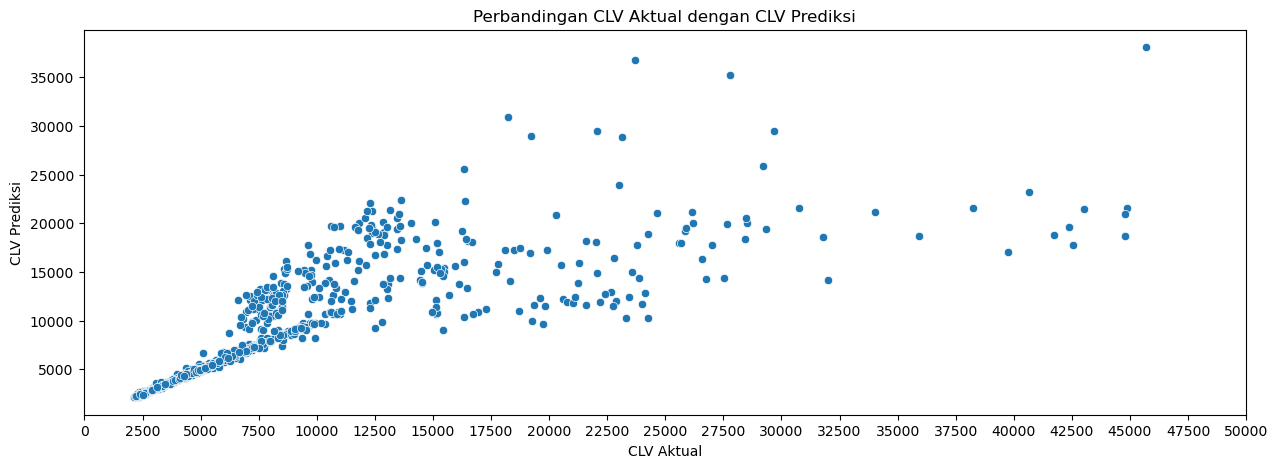

In [157]:
plt.figure(figsize=(15,5))
plot = sns.scatterplot(x=y_test, y=y_pred_after).set(title='Perbandingan CLV Aktual dengan CLV Prediksi', 
                                               xlabel='CLV Aktual', 
                                               ylabel='CLV Prediksi')
plt.xticks(ticks=range(0,50001,2500))
;

Adanya nilai-nilai error yang besar membuat perbedaan yang cukup signifikan antara nilai RMSE dan MAE. Hal ini dapat tergambarkan pula pada *scatterplot* di atas, di mana terdapat *CLV* aktual yang rendah tapi diprediksi jauh lebih tinggi (*overestimation*), dan juga sebaliknya (*underestimation*).

Dari *scatterplot* diatas dapat kita amati bahwa pada nilai *CLV* yang lebih kecil, model ini cenderung lebih akurat dalam memprediksi *CLV* klien. Namun, semakin besar nilai *CLV* aktual, maka hasil prediksi model menjadi semakin tidak akurat. Ini menjadi salah satu limitasi 

Mari kita lihat fitur-fitur apa saja yang paling penting untuk menentukan nilai *CLV* seorang klien.

In [102]:
# Mencari nama kolom untuk fitur numerikal
column_numerical = list(randomsearchrf2.best_estimator_['preprocessing'].transformers_[0][1][1].get_feature_names_out())
column_numerical[0] = 'Constant'
column_numerical[1] = 'Number of Policies'
column_numerical[2] = 'Monthly Premium Auto'
column_numerical[3] = 'Total Claim Amount'
column_numerical[4] = 'Income'
column_numerical

['Constant',
 'Number of Policies',
 'Monthly Premium Auto',
 'Total Claim Amount',
 'Income']

In [118]:
# Mencari nama kolom untuk pipeline ordinal_robust
column_ordinal_robust = list(transformer.transformers_[2][1][0].get_feature_names_out())
column_ordinal_robust[0] = 'Coverage'
column_ordinal_robust[1] = 'Education'
column_ordinal_robust

['Coverage', 'Education']

In [122]:
# Mencari nama kolom untuk onehot encoder
column_onehot = list(transformer.transformers_[1][1].get_feature_names_out())
column_onehot

['Vehicle Class_Luxury Car',
 'Vehicle Class_Luxury SUV',
 'Vehicle Class_SUV',
 'Vehicle Class_Sports Car',
 'Vehicle Class_Two-Door Car',
 'Renew Offer Type_Offer2',
 'Renew Offer Type_Offer3',
 'Renew Offer Type_Offer4',
 'Employment Status_Employed',
 'Employment Status_Medical Leave',
 'Employment Status_Retired',
 'Employment Status_Unemployed',
 'Marital Status_Married',
 'Marital Status_Single']

In [123]:
# Menggabungkan nama kolom yang sudah didapat
col_all = column_numerical + column_ordinal_robust + column_onehot
col_all

['Constant',
 'Number of Policies',
 'Monthly Premium Auto',
 'Total Claim Amount',
 'Income',
 'Coverage',
 'Education',
 'Vehicle Class_Luxury Car',
 'Vehicle Class_Luxury SUV',
 'Vehicle Class_SUV',
 'Vehicle Class_Sports Car',
 'Vehicle Class_Two-Door Car',
 'Renew Offer Type_Offer2',
 'Renew Offer Type_Offer3',
 'Renew Offer Type_Offer4',
 'Employment Status_Employed',
 'Employment Status_Medical Leave',
 'Employment Status_Retired',
 'Employment Status_Unemployed',
 'Marital Status_Married',
 'Marital Status_Single']

In [135]:
# Membuat dataframe yang berisi fitur beserta tingkat kepentingannya (feature importance)
feature_imp_df = pd.DataFrame(randomsearchrf2.best_estimator_['modeling'].feature_importances_, col_all)
feature_imp_df.rename(columns={0:'Feature Importance'}, inplace=True)
feature_imp_df

,Feature Importance
Constant,0.0000000000
Number of Policies,0.6115849089
Monthly Premium Auto,0.2795506500
Total Claim Amount,0.0408303903
Income,0.0294780649
Coverage,0.0000791133
Education,0.0007581834
Vehicle Class_Luxury Car,0.0012993037
Vehicle Class_Luxury SUV,0.0006850331
Vehicle Class_SUV,0.0015458815


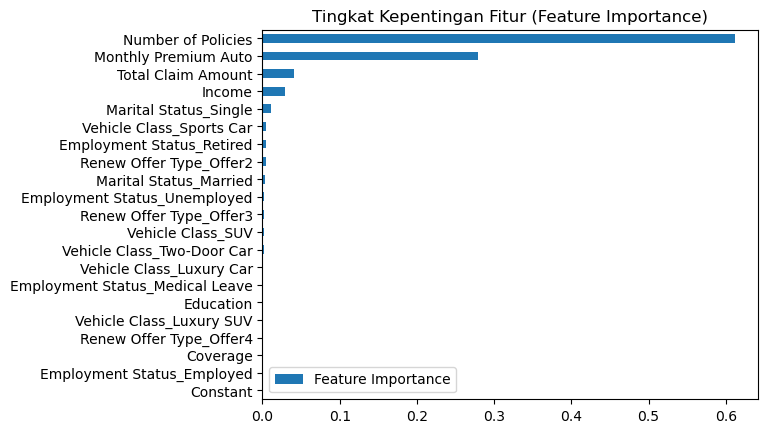

In [136]:
# Menampilkan tingkat kepentingan tiap fitur kedalam barplot
feature_imp = feature_imp_df.sort_values(by='Feature Importance')
feature_imp.plot(kind='barh', title='Tingkat Kepentingan Fitur (Feature Importance)');

Ternyata, fitur yang paling penting untuk menentukan nilai *CLV* seorang klien adalah *Number of Policies* (jumlah polis asuransi yang dimiliki klien).

### **7. Conclusion**

Mari kita tes model kita kepada salah satu klien dari perusahaan A. Disini saya mengambil klien dengan urutan ke 2212 dari *dataset* awal dengan detail fitur sebagai berikut:

In [127]:
df_testing = X_test.head(3)
klienA = df_testing.tail(1)
klienA

,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income
2212,Four-Door Car,Extended,Offer1,Employed,Married,Bachelor,2.0000000000,89.0000000000,527.1390740000,75313.0000000000


In [128]:
# Uji coba model untuk mencari nilai CLV prediksi klien A
best_model = randomsearchrf2.best_estimator_

best_model.fit(X_train, y_train)

clv_klien_prediksi = model.predict(klienA)
clv_klien_prediksi

array([12644.35710766])

In [129]:
# Mencari nilai CLV aktual klien A
clv_klienA_aktual = df['Customer Lifetime Value'].iloc[2212]
clv_klienA_aktual

4027.703503

Dapat kita simpulkan bahwa nilai prediksi *CLV* klien A adalah 12644.36 dengan error +- 12.96% (nilai MAPE terbaik yang sudah kita dapatkan dari proses *modeling*). Jadi, rentang kemungkinan nilai prediksi *CLV* klien A adalah diantara 11005.65 - 14283.07. Namun, saat kita cek, ternyata nilai aktual *CLV* dari klien A adalah 4027.70, berbeda jauh dari hasil prediksi kita.

---
Berdasarkan pemodelan yang sudah dilakukan, fitur '*Number of Policies*' menjadi fitur yang paling berpengaruh terhadap '*Customer Lifetime Value*'.

 Metrik evaluasi yang digunakan pada model adalah nilai MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan *hyperparameter tuning*, yaitu sebesar 12.90%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan *CLV* klien baru di perusahaan A pada rentang nilai seperti yang dilatih terhadap model (didapat dari function df.describe(include='all') ):
 - *Number of Policies* dari 1 sampai 9
 - *Monthly Premium Auto* dari 61 sampai 249
 - *Total Claim Amount* dari 0.42 sampai 1961.16
 - *Income* dari 10037 sampai 99934
 - *Vehicle Class* dari kelompok Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury Car, dan Luxury SUV
 - *Coverage* tipe Basic, Extended, dan Premium
 - *Renew Offer Type* jenis Offer1, Offer2, Offer3, dan Offer4
 - *Employment Status* dari kelompok Employed, Unemployed, Medical Leave, Disabled, dan Retired
 - *Marital Status* dengan jenis Married, Single, dan Divorced
 - *Education* tingkat edukasi High Schoold or Below, College, Bachelor, Master, dan Doctor
 
 maka perkiraan *CLV*nya rata-rata akan meleset kurang lebih sebesar 12.90% dari nilai *CLV* seharusnya. 
 
 Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena *bias* yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara *CLV* aktual dan prediksi. *Bias* yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada *dataset* yang bisa merepresentasikan aspek informasi klien, seperti kelas kendaraan, jenis asuransi, status pekerjaan, status pernikahan, tingkat edukasi, dan lain-lain.

 Model ini tentu masih dapat ditingkatkan performanya agar dapat menghasilkan prediksi yang lebih baik lagi. Namun, kita harus mengatasi limitasi model yang akan dijabarkan dibawah ini.

---
Mengapa model kita memprediksi dengan kurang akurat? Karena model ini memiliki beberapa limitasi, diantaranya:
1. Jumlah fitur yang sedikit. Karena *dataset* yang didapatkan hanya berisi 10 fitur (10 kolom), maka tentu saja hasil prediksi hanya akan belajar dari fitur-fitur yang sedikit itu, sehingga model menjadi "kurang pintar". Ternyata, walaupun kita sudah menggunakan *polynomial feature*, namun hal itu tidak dapat meningkatkan performa model.
2. Jumlah data (dapat dihitung dari jumlah baris pada dataset) yang sangat sedikit. Kita hanya memiliki 5669 data diawal, sehingga model hanya dapat belajar dari rentang data-data tersebut. Apabila model disuruh prediksi data lain yang berada diluar dari rentang *dataset* yang kita miliki, maka hasil prediksi menjadi kurang akurat dan kurang bisa dipercaya.
3. Masih ada *outliers*. Di satu sisi, apabila kita menghilangkan seluruh *outliers*, maka kita akan kehilangan lebih banyak data dari data yang jumlahnya sudah sangat sedikit. Di sisi lainnya, *outliers* dapat mengurangi performa model. Jadi, setiap keputusan yang diambil memang ada kelebihan dan kekurangannya.

### **8. Recommendation**

### Untuk bisnis.

Dikarenakan nilai *error* yang cukup besar dari nilai *CLV* aktual dengan *CLV* prediksi, maka hasil prediksi model ini sebaiknya tidak secara mentah-mentah dipercaya oleh perusahaan A untuk memprediksi *CLV* kliennya. Hal ini disebabkan oleh limitasi yang telah dijelaskan diatas. Namun, hasil prediksi untuk nilai *CLV* yang rendah masih cukup akurat. Perusahaan A masih dapat memercayai hasil prediksi model apabila nilai *CLV* masih sekitar dibawah 8000 (berdasarkan visual dari *scatterplot*).

### Untuk performa model.

Perusahaan A dapat memperbaiki performa model melalui beberapa cara, diantaranya:


- Menambah jumlah fitur klien. Hal ini dapat mengurangi risiko model *underfitting*. Namun, tentu saja fitur yang ditambahkan tidak boleh sembarangan. Apabila perusahaan A menambah terlalu banyak fitur, maka model dapat cenderung *overfitting*. Tambahkan fitur-fitur yang berkaitan/berkorelasi kuat dengan *CLV* seseorang, misalkan tingkat retensi klien (semakin lama klien menggunakan produk/jasa perusahaan A, maka semakin tinggi pula nilai *CLV* klien itu), frekuensi pembelian klien (semakin sering klien melakukan pembelian, semakin tinggi nilai *CLV* klien itu), dan demografi klien (segmen klien yang berbeda mungkin memiliki perilaku pembelian (*purchasing behavior*) yang berbeda. Hal ini dapat mempengaruhi *CLV* mereka).


- Menambah jumlah data klien. Hal ini dapat membuat model menjadi semakin "pintar" karena model akan belajar dari data yang lebih heterogen/lebih beragam. Hal ini juga dapat mengurangi kemungkinan *overfitting*.

- Meningkatkan kualitas data. Ada aturan terkenal dalam dunia *machine learning* yaito GIGO (*Garbage In, Garbage Out*). Tidak peduli seberapa canggih dan akurat model yang dipakai, apabila data yang diolah berkualitas rendah, maka hasilnya akan berkualitas rendah juga.

---
---
# Save Model

In [152]:
# Save model
import pickle
best_model = randomsearchrf2.best_estimator_

best_model.fit(X_train, y_train)

pickle.dump(best_model, open('Model_Customer_Lifetime_Value_Prediction_RF.sav', 'wb'))

## Mencoba model yang sudah dibuat kepada seorang klien baru

In [131]:
# Load model
filename = 'Model_Customer_Lifetime_Value_Prediction_RF.sav'
loaded_model = pickle.load(open(filename, 'rb'))

Mengecek rentang tiap data/fitur yang sudah dipelajari model.

In [132]:
display(df.describe(), df.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5017.0000000000,5017.0000000000,5017.0000000000,3697.0000000000,5017.0000000000
mean,2.9952162647,91.8391469005,421.7149885669,51279.2320800649,7944.0456092314
std,2.3864101047,31.7387825427,272.6731701095,24234.1625062771,6633.5116516023
min,1.0000000000,61.0000000000,0.4233100000,10037.0000000000,1898.0076750000
25%,1.0000000000,68.0000000000,250.4540120000,29550.0000000000,3944.2311850000
50%,2.0000000000,81.0000000000,374.1083190000,49078.0000000000,5802.0659780000
75%,4.0000000000,108.0000000000,547.2000000000,70837.0000000000,8935.0341400000
max,9.0000000000,249.0000000000,1961.1620490000,99934.0000000000,58753.8804600000


,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education
count,5017,5017,5017,5017,5017,5017
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2565,3096,2002,3168,2969,1522


Membuat fitur/informasi dari klien baru tersebut.

In [133]:
tester = pd.DataFrame({
    'Vehicle Class':['Luxury SUV'],
    'Coverage':['Extended'],
    'Renew Offer Type':['Offer2'],
    'Employment Status':['Retired'],
    'Marital Status':['Married'],
    'Education':['Doctor'],
    'Number of Policies':[3],
    'Monthly Premium Auto':[200],
    'Total Claim Amount':[1500],
    'Income':[85000]
})

tester

,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income
0,Luxury SUV,Extended,Offer2,Retired,Married,Doctor,3,200,1500,85000


## Mengaplikasikan model/algoritma kepada calon klien baru

In [134]:
loaded_model.predict(tester)

array([15559.29615045])

Ternyata, calon klien dengan fitur-fitur sebagai berikut:
- Vehicle Class = Luxury SUV
- Coverage = Extended
- Renew Offer Type = Offer2
- Employment Status = Retired
- Marital Status = Married
- Education = Doctor
- Number of Policies = 3
- Monthly Premium Auto = 200
- Total Claim Amount = 1500
- Income = 85000

akan diprediksi memiliki nilai *CLV* sebesar 15559.30

In [153]:
randomsearchrf2.best_params_

{'preprocessing__pipe_iterative_robust__polynomial__degree': 1,
 'modeling__n_estimators': 356,
 'modeling__min_samples_split': 6,
 'modeling__min_samples_leaf': 7,
 'modeling__max_features': 'auto',
 'modeling__max_depth': 38}